<a href="https://colab.research.google.com/github/SAFIN-157/Automobile-Exploratory-Data-Analysis/blob/main/Laptop_Price_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data and change column header

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
filepath="/content/clean_laptop_df.csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


Analyzing Individual Feature Patterns Using Visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
print(df.dtypes)

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_lb           float64
Price                 int64
Price-binned         object
Screen-Full_HD         bool
Screen-IPS_panel       bool
dtype: object


Correlation

In [5]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price
Unnamed: 0.1,1.000000,1.000000,0.028451,0.022852,-0.092529,-0.037261,-0.153629,0.424423,0.089017,-0.124216,-0.153316,0.321933
Unnamed: 0,1.000000,1.000000,0.028451,0.022852,-0.092529,-0.037261,-0.153629,0.424423,0.089017,-0.124216,-0.153316,0.321933
Category,0.028451,0.028451,1.000000,-0.114174,-0.043378,0.232425,-0.285397,-0.053414,0.030127,0.038246,-0.381032,0.286243
GPU,0.022852,0.022852,-0.114174,1.000000,-0.199549,0.145388,0.154366,0.291439,0.218973,0.094288,0.262853,0.288298
OS,-0.092529,-0.092529,-0.043378,-0.199549,1.000000,0.016954,0.146614,0.050407,-0.074625,0.007751,0.120858,-0.221730
CPU_core,-0.037261,-0.037261,0.232425,0.145388,0.016954,1.000000,0.041123,0.242722,0.473075,0.400015,0.068599,0.459398
Screen_Size_inch,-0.153629,-0.153629,-0.285397,0.154366,0.146614,0.041123,1.000000,-0.000955,0.018237,0.119746,0.797605,-0.110565
CPU_frequency,0.424423,0.424423,-0.053414,0.291439,0.050407,0.242722,-0.000955,1.000000,0.226736,0.035557,0.066522,0.366666
RAM_GB,0.089017,0.089017,0.030127,0.218973,-0.074625,0.473075,0.018237,0.226736,1.000000,0.361469,0.055068,0.549297
Storage_GB_SSD,-0.124216,-0.124216,0.038246,0.094288,0.007751,0.400015,0.119746,0.035557,0.361469,1.000000,0.112519,0.243421


The scatterplot plus the fitted regression line

(0.0, 3974.15)

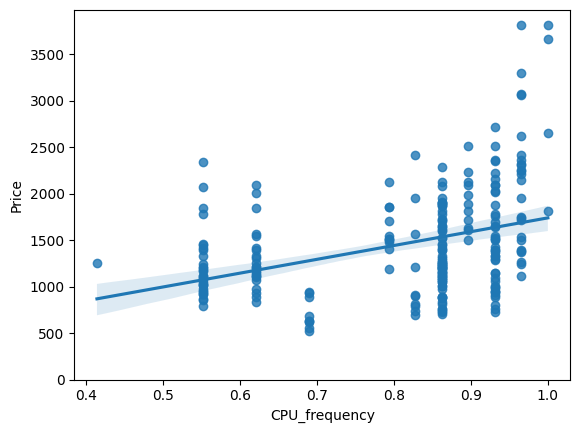

In [6]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

In [7]:
df[['CPU_frequency', 'Price']].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


In [8]:
df[['Screen_Size_inch', 'Price']].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110565
Price,-0.110565,1.000000


In [9]:
df[['Weight_lb', 'Price']].corr()

,Weight_lb,Price
Weight_lb,1.000000,-0.050312
Price,-0.050312,1.000000


(0.0, 3974.15)

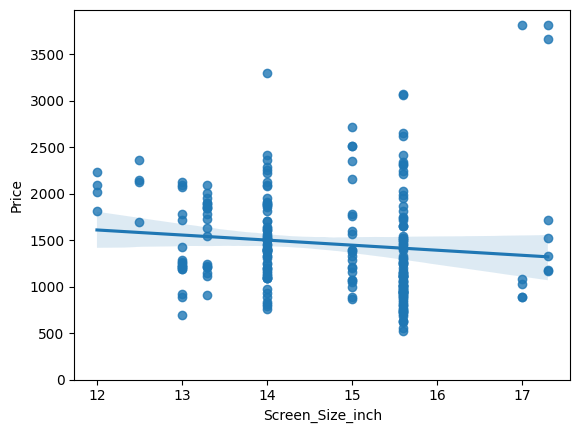

In [10]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

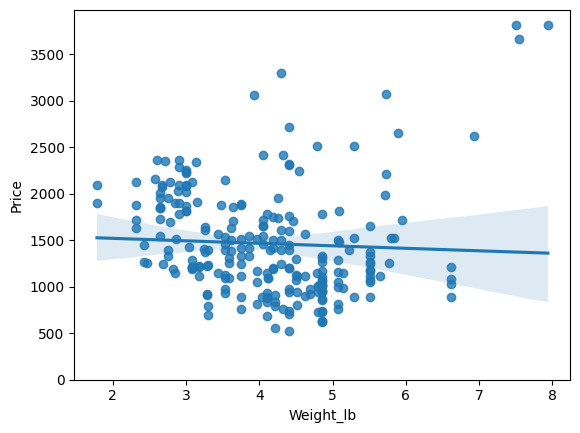

In [11]:
sns.regplot(x="Weight_lb", y="Price", data=df)
plt.ylim(0,)

Categorical Variables

<Axes: xlabel='Category', ylabel='Price'>

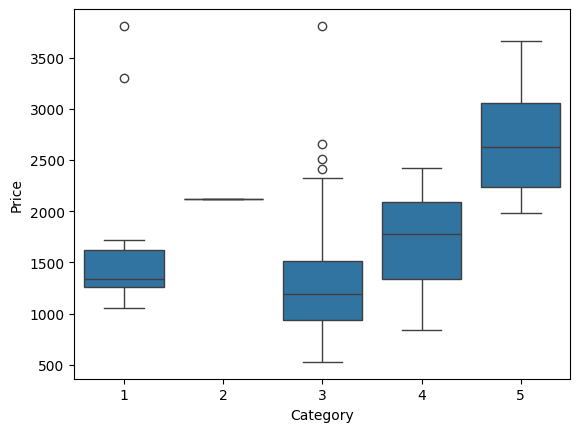

In [12]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

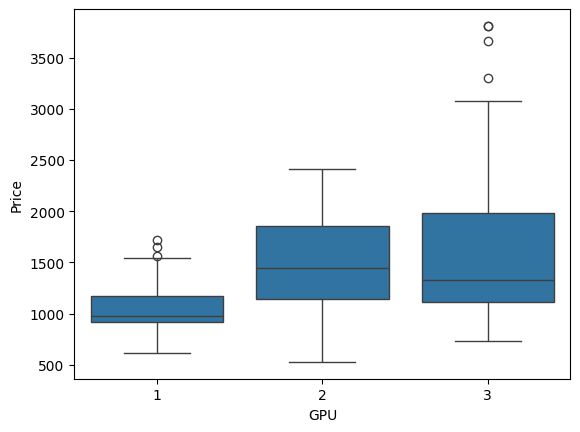

In [13]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

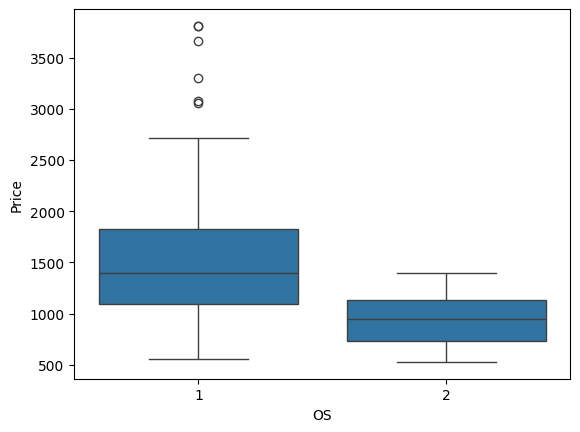

In [14]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

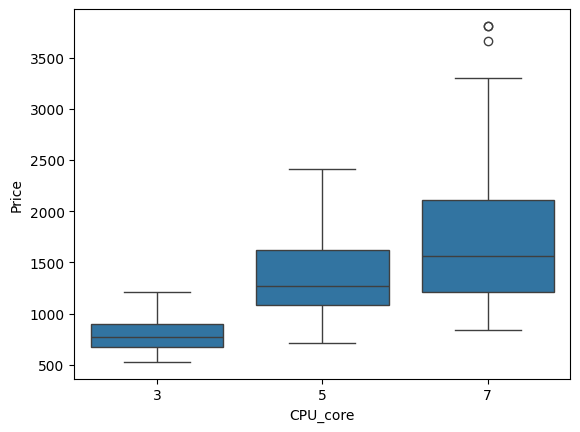

In [15]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

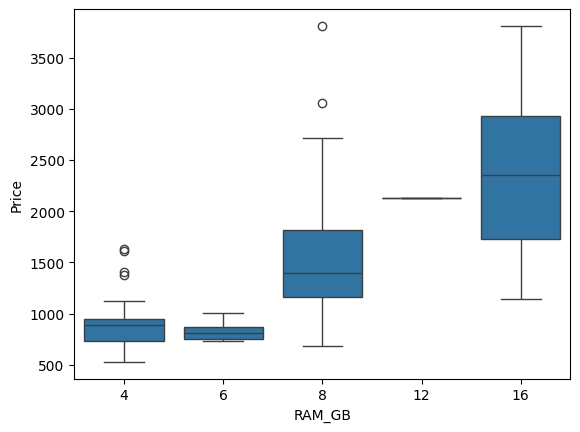

In [16]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

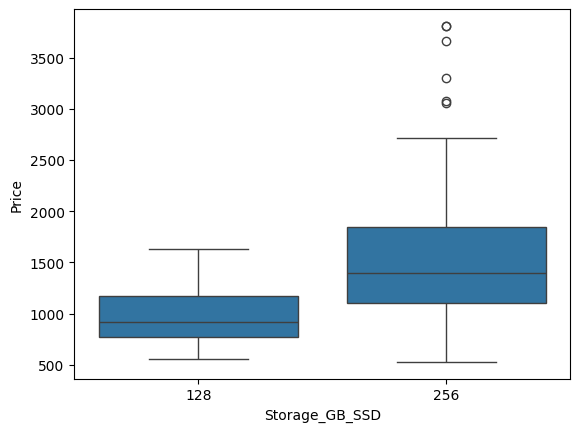

In [17]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

Descriptive Statistical Analysis

In [18]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.687951,0.813822,7.882353,245.781513,4.106221,1462.344538
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.165589,0.141860,2.482603,34.765316,1.078442,574.607699
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.598425,0.931034,8.000000,256.000000,4.851000,1777.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.299213,1.000000,16.000000,256.000000,7.938000,3810.000000


In [19]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


Basics of Grouping

In [20]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
grouped_test1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


pivot table

In [21]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

Heatmap

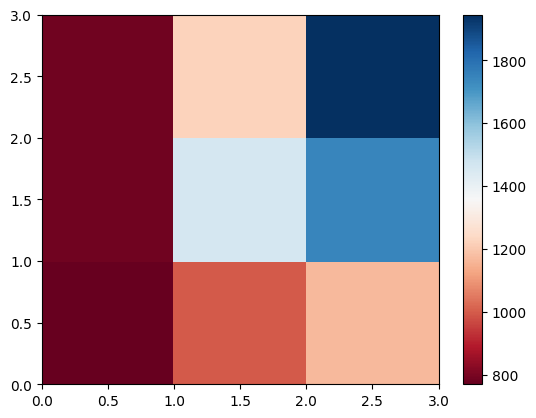

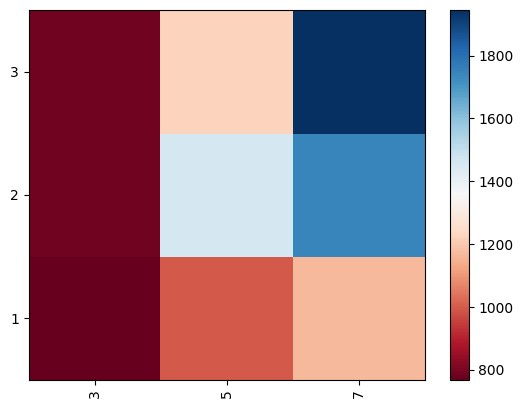

In [22]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

pearson correlation and p value

In [23]:
from scipy import stats
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_lb','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857844  with a P-value of P = 3.6815606288428415e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.502463350713357e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.243420755218103  with a P-value of P = 0.0001489892319172414
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11056471275425057  with a P-value of P = 0.0887645673270076
Weight_lb
The Pearson Correlation Coefficient for  Weight_lb  is -0.05031225837751549  with a P-value of P = 0.4397693853433896
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009183e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.0005696642559246719
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881427  with a P-valu